## Combine three indexes into one plot

In [7]:
import requests
from collections import defaultdict, OrderedDict
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def process_token_transactions(token_address):
    # API setup
    base_url = "https://pro-api.solscan.io/v1.0/token/transfer"
    headers = {
        "accept": "*/*",
        "token": "MyPassword"
    }
    params = {
        "tokenAddress": token_address,
        "limit": 50,
        "offset": 0
    }

    all_transactions = []
    while True:
        response = requests.get(base_url, headers=headers, params=params)
        if response.status_code == 200:
            data = response.json()
            all_transactions.extend(data['items'])
            if len(data['items']) < 50:
                break
            params['offset'] += 50
        else:
            print(f"Failed at offset {params['offset']}: {response.status_code}")
            break

    balance_changes = defaultdict(lambda: defaultdict(float))
    all_accounts = set()
    prices_over_time = {}
    volume_by_block_time = defaultdict(float)
    rolling_hhi = OrderedDict()  # Initialize rolling HHI here

    for transaction in all_transactions:
        block_time = datetime.utcfromtimestamp(transaction['blockTime'])
        source = transaction['sourceOwnerAccount']
        destination = transaction['destOwnerAccount']
        amount = float(transaction['amount']) / 1000000  # Assuming 'amount' is in smallest unit
        price_info = transaction.get('priceInfo')

        all_accounts.update([source, destination])

        if price_info and 'value' in price_info and price_info['value'] is not None:
            USD_amount = float(amount / price_info['value'])
            balance_changes[block_time][source] -= USD_amount
            balance_changes[block_time][destination] += USD_amount
            volume_by_block_time[block_time] += USD_amount
            prices_over_time[block_time] = price_info['value']

    block_times = sorted(balance_changes.keys())
    cumulative_balances = OrderedDict()
    previous_balances = {acc: 0 for acc in all_accounts}

    for block_time in block_times:
        current_balances = previous_balances.copy()
        for acc, change in balance_changes[block_time].items():
            current_balances[acc] += change
        cumulative_balances[block_time] = current_balances
        previous_balances = current_balances

        total_tokens = sum(abs(bal) for bal in current_balances.values())
        hhi = sum((abs(bal * 100 / total_tokens) ** 2 if total_tokens > 0 else 0 for bal in current_balances.values()))
        rolling_hhi[block_time] = hhi

    # Visualization logic is unchanged
    # Prepare the data for plotting
    hhi_values = [rolling_hhi[bt] for bt in block_times]
    price_values = [prices_over_time[bt] for bt in block_times if bt in prices_over_time]
    volume_values = [volume_by_block_time[bt] for bt in block_times]

    volume_min, volume_max = min(volume_values), max(volume_values)
    volume_values_normalized = [(v - volume_min) / (volume_max - volume_min) for v in volume_values]

    # Set up subplots
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot HHI data on the primary y-axis
    ax_hhi = ax1.twinx()
    hhi_line, = ax_hhi.plot(block_times, hhi_values, 'g-', label='HHI')
    ax_hhi.set_ylabel('HHI', color='g')
    ax_hhi.tick_params(axis='y', labelcolor='g')

    # Plot price data on the primary y-axis
    price_line, = ax1.plot(block_times, price_values, 'b-', label='Price')
    ax1.set_ylabel('Price', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Plot volume data as bars on the same axis as the price
    volume_bars = ax1.bar(block_times, volume_values, width=0.01, color='r', alpha=0.3, label='Volume')

    # Set the x-axis major locator and formatter for better date formatting
    ax1.xaxis.set_major_locator(mdates.DayLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()  # Auto-format the dates

    # Add grid and legend
    ax1.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5)
    ax1.legend(handles=[price_line, hhi_line, volume_bars], loc='upper left')

    plt.tight_layout()
    plt.show()

    return rolling_hhi, prices_over_time, volume_by_block_time

## Seperate Three indexes

In [14]:
import requests
from collections import defaultdict, OrderedDict
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def process_token_transactions(token_address):
    # API setup
    base_url = "https://pro-api.solscan.io/v1.0/token/transfer"
    headers = {
        "accept": "*/*",
        "token": "MyPassword"
    }
    params = {
        "tokenAddress": token_address,
        "limit": 50,
        "offset": 0
    }

    all_transactions = []
    while True:
        response = requests.get(base_url, headers=headers, params=params)
        if response.status_code == 200:
            data = response.json()
            all_transactions.extend(data['items'])
            if len(data['items']) < 50:
                break
            params['offset'] += 50
        else:
            print(f"Failed at offset {params['offset']}: {response.status_code}")
            break

    balance_changes = defaultdict(lambda: defaultdict(float))
    all_accounts = set()
    prices_over_time = {}
    volume_by_block_time = defaultdict(float)
    rolling_hhi = OrderedDict()  # Initialize rolling HHI here

    for transaction in all_transactions:
        block_time = datetime.utcfromtimestamp(transaction['blockTime'])
        source = transaction['sourceOwnerAccount']
        destination = transaction['destOwnerAccount']
        amount = float(transaction['amount']) / 1000000  # Assuming 'amount' is in smallest unit
        price_info = transaction.get('priceInfo')

        all_accounts.update([source, destination])

        if price_info and 'value' in price_info and price_info['value'] is not None:
            USD_amount = float(amount / price_info['value'])
            balance_changes[block_time][source] -= USD_amount
            balance_changes[block_time][destination] += USD_amount
            volume_by_block_time[block_time] += USD_amount
            prices_over_time[block_time] = price_info['value']

    block_times = sorted(balance_changes.keys())
    cumulative_balances = OrderedDict()
    previous_balances = {acc: 0 for acc in all_accounts}

    for block_time in block_times:
        current_balances = previous_balances.copy()
        for acc, change in balance_changes[block_time].items():
            current_balances[acc] += change
        cumulative_balances[block_time] = current_balances
        previous_balances = current_balances

        total_tokens = sum(abs(bal) for bal in current_balances.values())
        hhi = sum((abs(bal * 100 / total_tokens) ** 2 if total_tokens > 0 else 0 for bal in current_balances.values()))
        rolling_hhi[block_time] = hhi

    # Visualization logic is unchanged
    # Prepare the data for plotting
    hhi_values = [rolling_hhi[bt] for bt in block_times]
    price_values = [prices_over_time[bt] for bt in block_times if bt in prices_over_time]
    volume_values = [volume_by_block_time[bt] for bt in block_times]

    volume_min, volume_max = min(volume_values), max(volume_values)
    volume_values_normalized = [(v - volume_min) / (volume_max - volume_min) for v in volume_values]

    # Set up subplots
    fig, (ax_hhi, ax_price, ax_volume) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

    # HHI Plot
    ax_hhi.plot(block_times, hhi_values, 'g-', label='HHI')
    ax_hhi.set_ylabel('HHI')
    ax_hhi.legend(loc='upper left')
    ax_hhi.grid(True)

    # Price Plot
    ax_price.plot(block_times, price_values, 'b-', label='Price')
    ax_price.set_ylabel('Price')
    ax_price.legend(loc='upper left')
    ax_price.grid(True)

    # Volume Plot (Bar Chart)
    ax_volume.bar(block_times, volume_values_normalized, width=0.01, color='r', label='Volume (normalized)')
    ax_volume.set_ylabel('Volume')
    ax_volume.set_xlabel('Block Time')
    ax_volume.legend(loc='upper left')
    ax_volume.grid(True)

    # Format the date on the x-axis
    ax_volume.xaxis.set_major_locator(mdates.DayLocator())
    ax_volume.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()  # Auto-format the dates to look cleaner

    plt.tight_layout()
    plt.show()

    return rolling_hhi, prices_over_time, volume_by_block_time

# PEPE WIF PORK

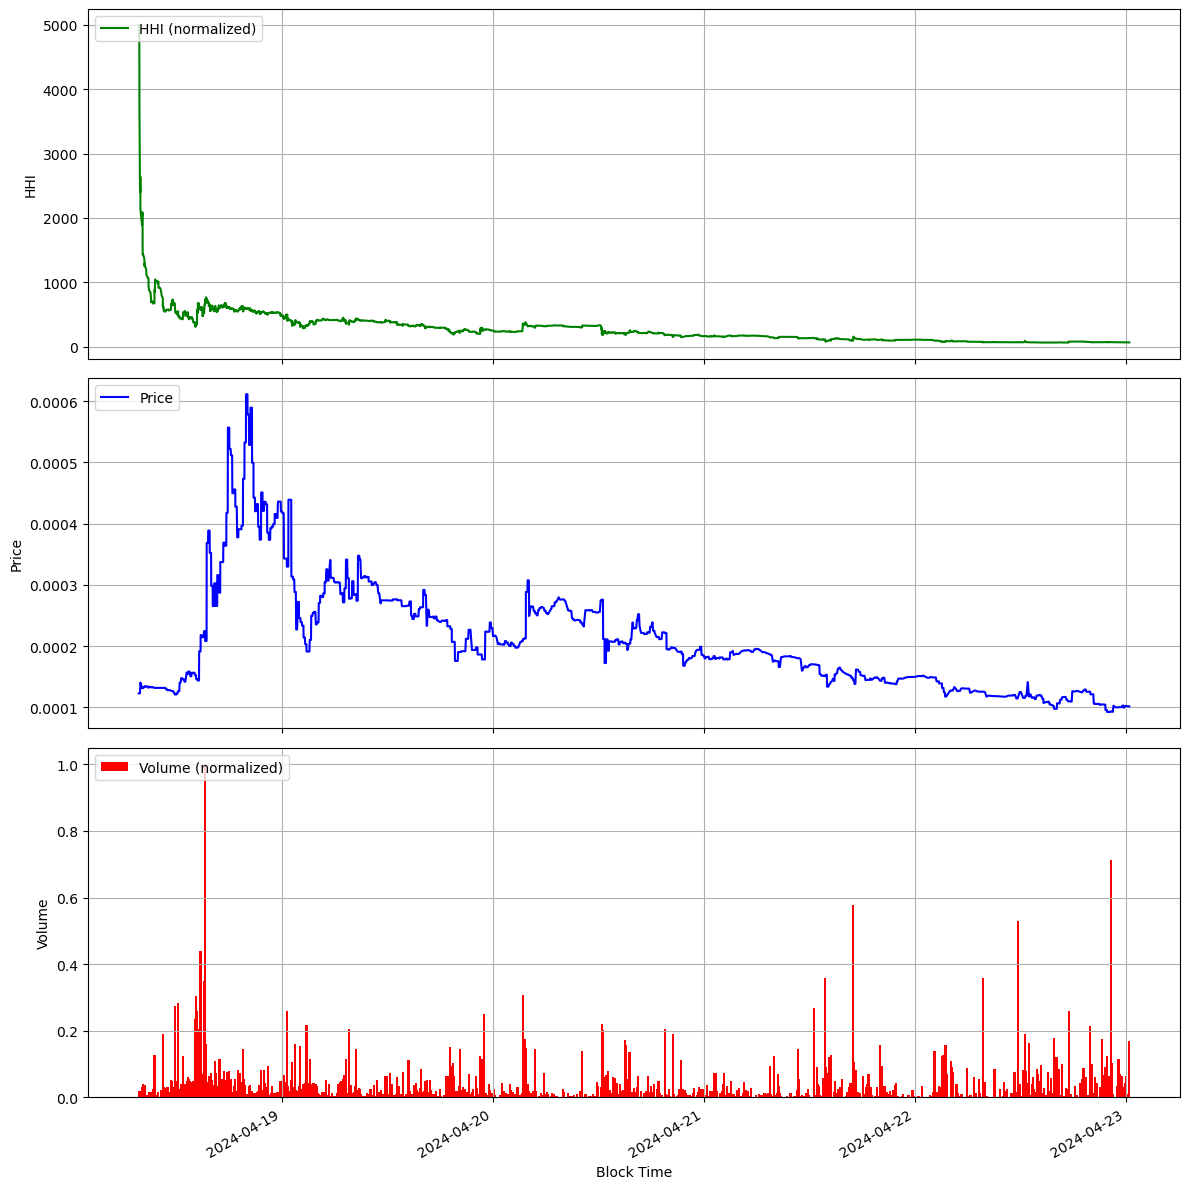

In [15]:
token_address = '5CA8ja6ZrQswkgNH4yoC8BdhcSwSwH3fR1WF8gDHVb3s'
hhi_data, prices, volume_data = process_token_transactions(token_address)

# wifejak

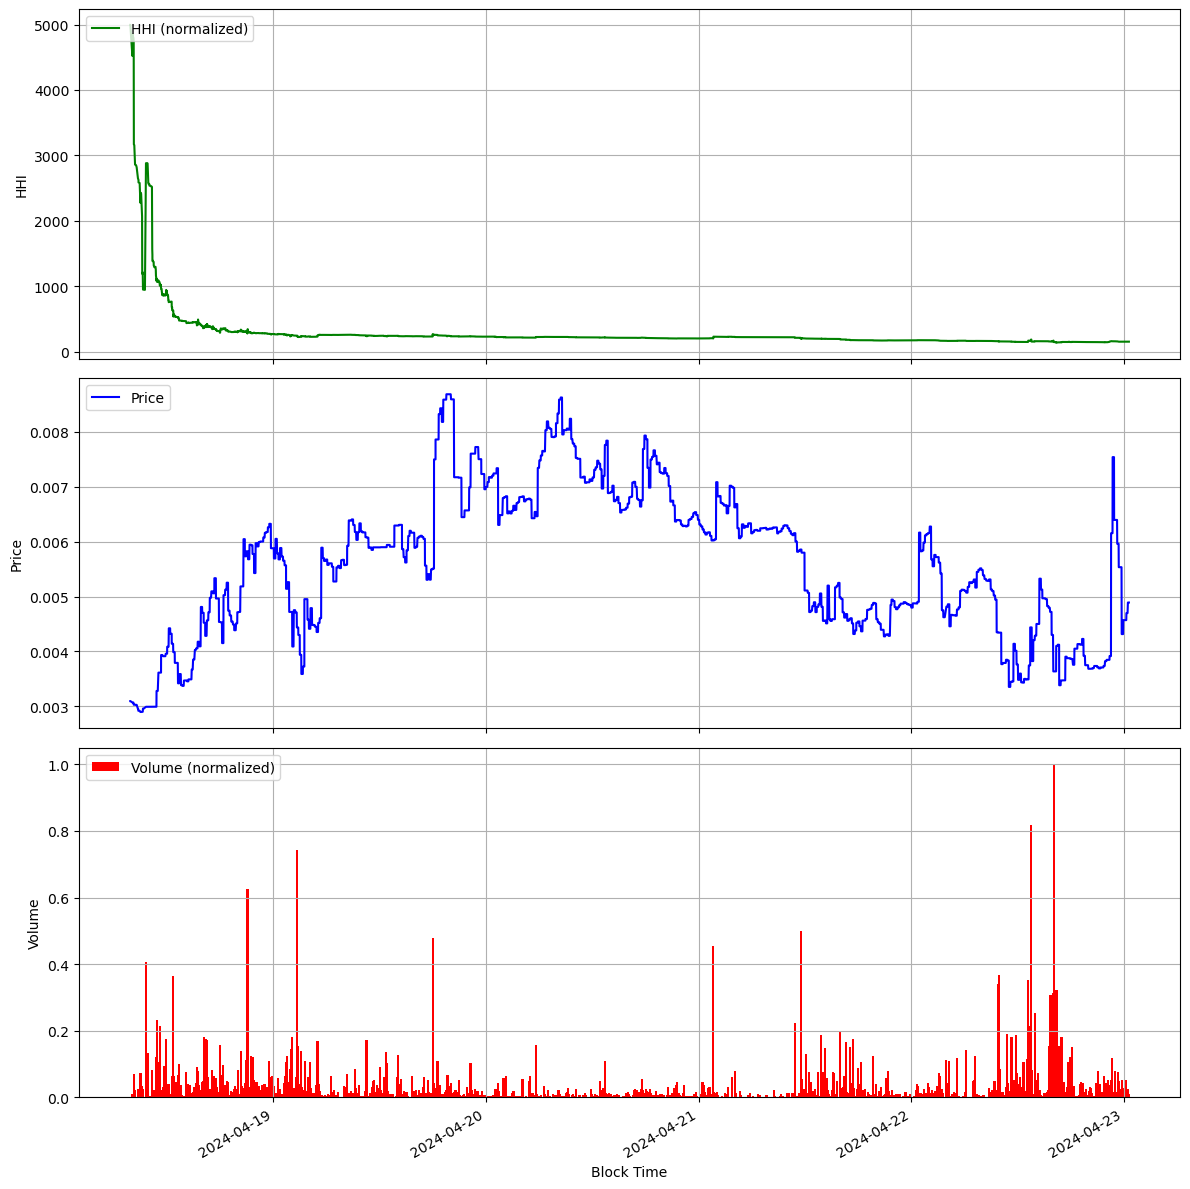

In [16]:
token_address = '4y3oUrsJfSp431R3wJrWiaLxRPsnYtpkVJmoV2bYpBiy'
hhi_data, prices, volume_data = process_token_transactions(token_address)

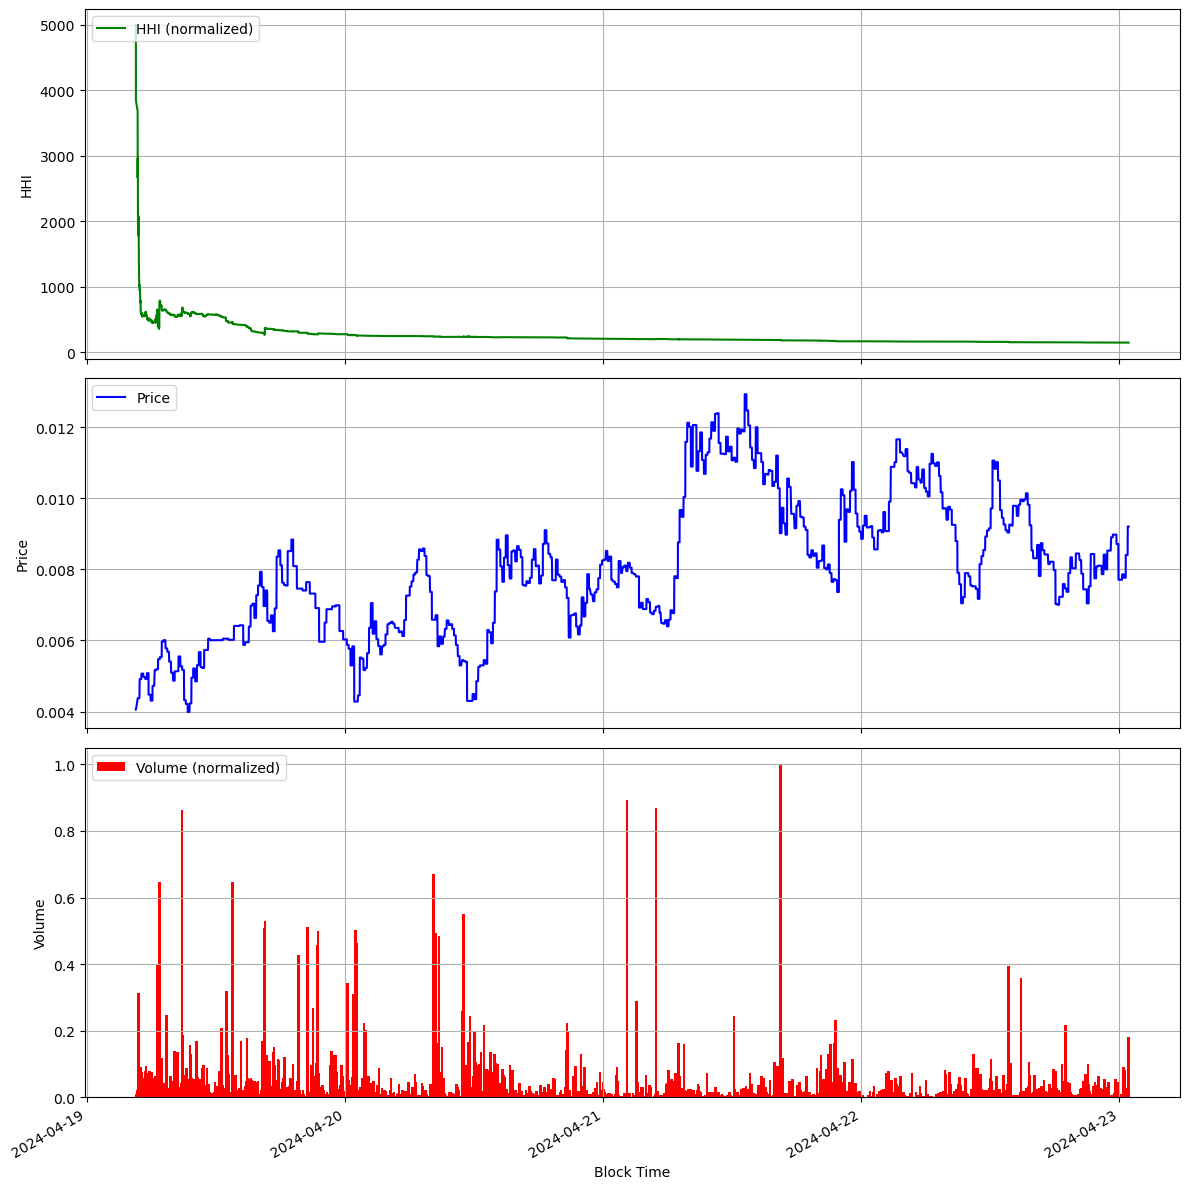

In [17]:
token_address = 'AbrMJWfDVRZ2EWCQ1xSCpoVeVgZNpq1U2AoYG98oRXfn'
hhi_data, prices, volume_data = process_token_transactions(token_address)

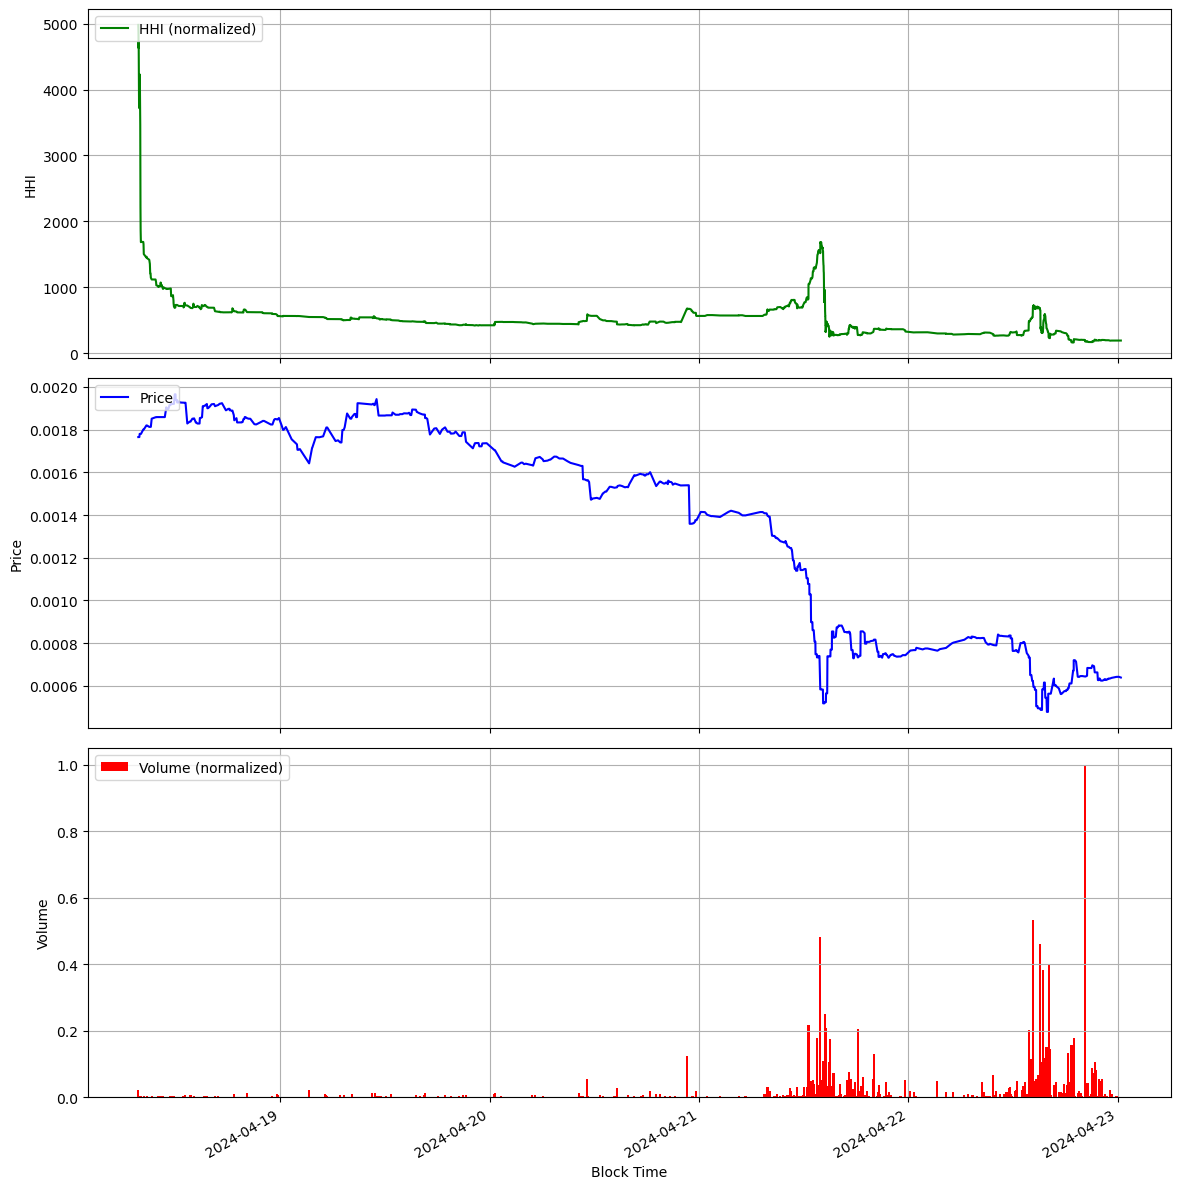

In [18]:
token_address = '8TfYk26pFxnaCmZbjoSMCzktDU16H5CgZ1Z9eTnB12MR'
hhi_data, prices, volume_data = process_token_transactions(token_address)

# Getting HHI

In [12]:
def process_token_transactions(token_address):
    # API setup
    base_url = "https://pro-api.solscan.io/v1.0/token/transfer"
    headers = {
        "accept": "*/*",
        "token": "MyPassword"
    }
    params = {
        "tokenAddress": token_address,
        "limit": 50,
        "offset": 0
    }

    all_transactions = []
    while True:
        response = requests.get(base_url, headers=headers, params=params)
        if response.status_code == 200:
            data = response.json()
            all_transactions.extend(data['items'])
            if len(data['items']) < 50:
                break
            params['offset'] += 50
        else:
            print(f"Failed at offset {params['offset']}: {response.status_code}")
            break

    balance_changes = defaultdict(lambda: defaultdict(float))
    all_accounts = set()
    prices_over_time = {}
    volume_by_block_time = defaultdict(float)
    rolling_hhi = OrderedDict()  # Initialize rolling HHI here

    for transaction in all_transactions:
        block_time = datetime.utcfromtimestamp(transaction['blockTime'])
        source = transaction['sourceOwnerAccount']
        destination = transaction['destOwnerAccount']
        amount = float(transaction['amount']) / 1000000  # Assuming 'amount' is in smallest unit
        price_info = transaction.get('priceInfo')

        all_accounts.update([source, destination])

        if price_info and 'value' in price_info and price_info['value'] is not None:
            USD_amount = float(amount / price_info['value'])
            balance_changes[block_time][source] -= USD_amount
            balance_changes[block_time][destination] += USD_amount
            volume_by_block_time[block_time] += USD_amount
            prices_over_time[block_time] = price_info['value']

    block_times = sorted(balance_changes.keys())
    cumulative_balances = OrderedDict()
    previous_balances = {acc: 0 for acc in all_accounts}

    for block_time in block_times:
        current_balances = previous_balances.copy()
        for acc, change in balance_changes[block_time].items():
            current_balances[acc] += change
        cumulative_balances[block_time] = current_balances
        previous_balances = current_balances

        total_tokens = sum(abs(bal) for bal in current_balances.values())
        hhi = sum((abs(bal * 100 / total_tokens) ** 2 if total_tokens > 0 else 0 for bal in current_balances.values()))
        rolling_hhi[block_time] = hhi

    return rolling_hhi

token_address = '5CA8ja6ZrQswkgNH4yoC8BdhcSwSwH3fR1WF8gDHVb3s'
hhi_data = process_token_transactions(token_address)

In [13]:
hhi_data

OrderedDict([(datetime.datetime(2024, 4, 18, 7, 44, 34), 5000.0),
             (datetime.datetime(2024, 4, 18, 7, 48, 31), 4965.901212905073),
             (datetime.datetime(2024, 4, 18, 7, 49, 31), 3733.0279377856764),
             (datetime.datetime(2024, 4, 18, 7, 52, 57), 2479.4275523799147),
             (datetime.datetime(2024, 4, 18, 7, 55, 26), 2396.7855197987565),
             (datetime.datetime(2024, 4, 18, 7, 55, 54), 2640.8405225794877),
             (datetime.datetime(2024, 4, 18, 7, 56, 3), 2138.6397972707223),
             (datetime.datetime(2024, 4, 18, 8, 7, 13), 1889.2859336003821),
             (datetime.datetime(2024, 4, 18, 8, 7, 58), 2084.1032299241956),
             (datetime.datetime(2024, 4, 18, 8, 8, 30), 2040.777345961661),
             (datetime.datetime(2024, 4, 18, 8, 9, 39), 2084.1030267960055),
             (datetime.datetime(2024, 4, 18, 8, 11), 2059.331222097694),
             (datetime.datetime(2024, 4, 18, 8, 11, 1), 1568.830996909292),
            

## Token/list

In [44]:
# Base URL and headers setup
base_url = "https://pro-api.solscan.io/v1.0/token/list"
headers = {
    "accept": "*/*",
    "token": "MyPassword"
}

# Parameters for the request
params = {
    "sortBy": "market_cap",
    "direction": "desc",
    "limit": 50,
    "offset": 0
}

response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    # If the request was successful, handle the response here
    data = response.json()
    # Do something with the data
    print(data)
else:
    print(f"Failed to retrieve data: {response.status_code}")

{'data': [{'_id': '659e4e7bde09d4c3e526828d', 'address': 'So11111111111111111111111111111111111111112', 'coingeckoInfo': {'coingeckoRank': 5, 'marketCapRank': 5, 'marketData': {'currentPrice': 151.11, 'ath': 259.96, 'athChangePercentage': -41.93149, 'athDate': '2021-11-06T21:54:35.825Z', 'atl': 0.500801, 'atlChangePercentage': 30042.59404, 'atlDate': '2020-05-11T19:35:23.449Z', 'marketCap': 67503174747, 'marketCapRank': 5, 'fullyDilutedValuation': 86763222702, 'totalVolume': 2956451354, 'priceHigh24h': 152.5, 'priceLow24h': 146.96, 'priceChange24h': 0.290071, 'priceChangePercentage24h': 0.19233, 'priceChangePercentage7d': 1.962325616979034, 'priceChangePercentage14d': -14.382708116117856, 'priceChangePercentage30d': -12.289170520427955, 'priceChangePercentage60d': 0, 'priceChangePercentage200d': 550.7799192438343, 'priceChangePercentage1y': 606.5692396998816, 'marketCapChange24h': 208525440, 'marketCapChangePercentage24h': 0.30987, 'totalSupply': 574444530.54453, 'maxSupply': None, 'ci

In [45]:
import pandas as pd
df = pd.DataFrame(data)
df

,data,total
0,"{'_id': '659e4e7bde09d4c3e526828d', 'address':...",50
1,"{'_id': '65b221d716d314c0c114448c', 'address':...",50
2,"{'_id': '659e4e9bde09d4c3e5299db3', 'address':...",50
3,"{'_id': '65ea230a16d314c0c1dc3fb1', 'address':...",50
4,"{'_id': '659e4ebbde09d4c3e52d0e2a', 'address':...",50
5,"{'_id': '659e4eb4de09d4c3e52c3fdb', 'address':...",50
6,"{'_id': '659e4e7bde09d4c3e5268295', 'address':...",50
7,"{'_id': '659e4e8dde09d4c3e5283c91', 'address':...",50
8,"{'_id': '659e4e7cde09d4c3e52688a6', 'address':...",50
9,"{'_id': '659e4e84de09d4c3e5275311', 'address':...",50
